Importing Necessary Libraries

In [646]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, roc_auc_score

In [647]:
emp_details=pd.read_csv("E:/GUVI PROJECTS/Attrition/Employee-Attrition - Employee-Attrition.csv")

In [648]:
emp_details.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [649]:
emp_details.shape

(1470, 35)

In [650]:
emp_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [651]:
emp_details.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [652]:
emp_details.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [653]:
emp_details.duplicated().sum()

np.int64(0)

In [654]:
emp_details.drop_duplicates(inplace=True)

In [655]:
emp_details.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [656]:
emp_details.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'], axis=1, inplace=True)

In [657]:
emp_details.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

UNIVARIATE ANALYSIS

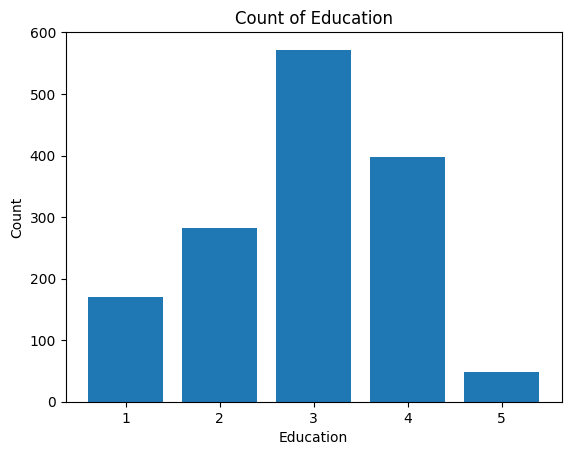

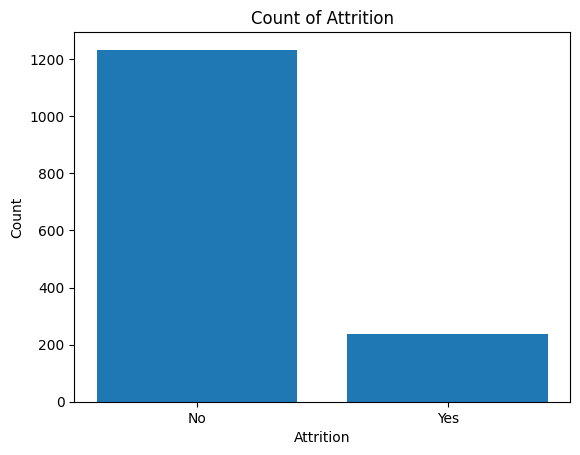

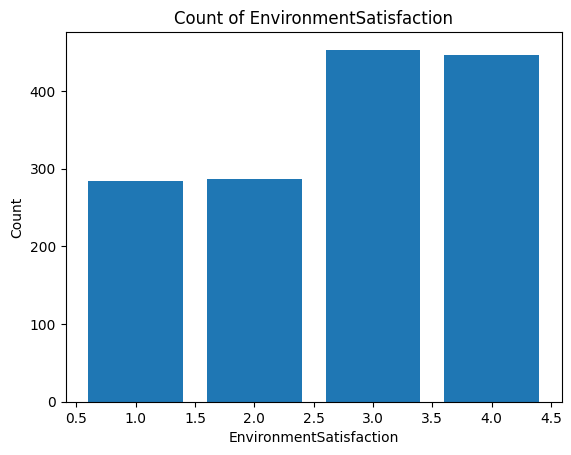

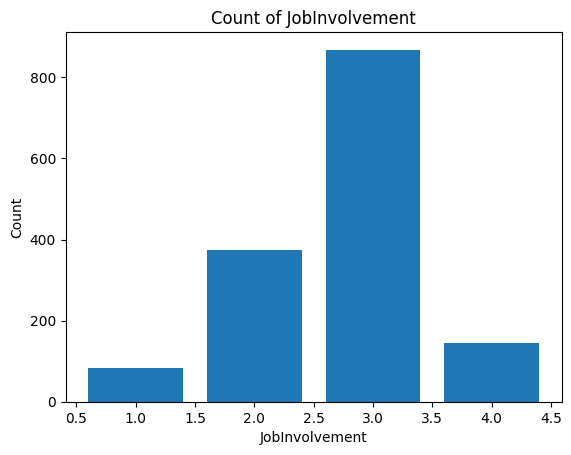

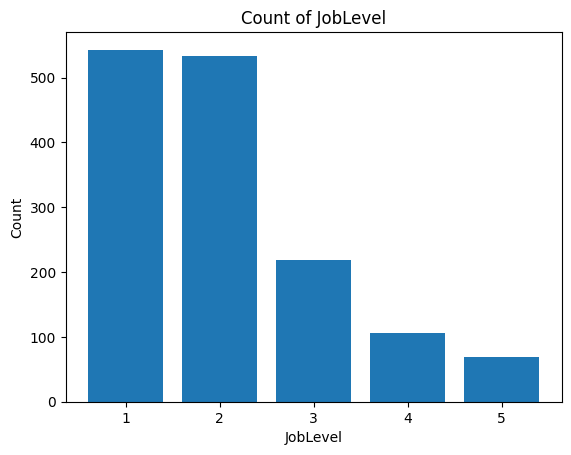

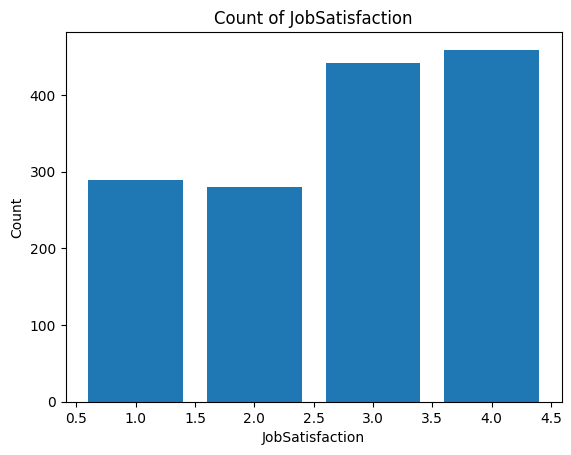

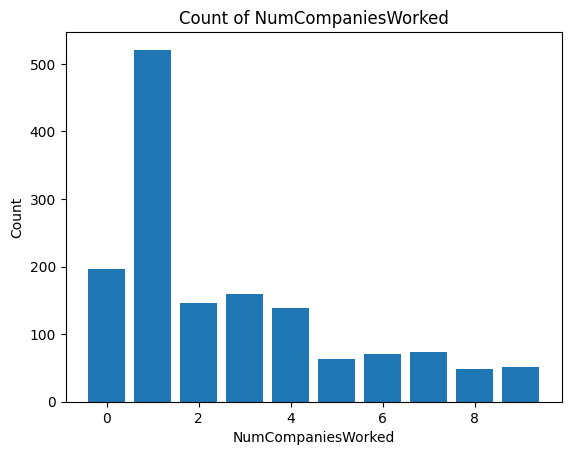

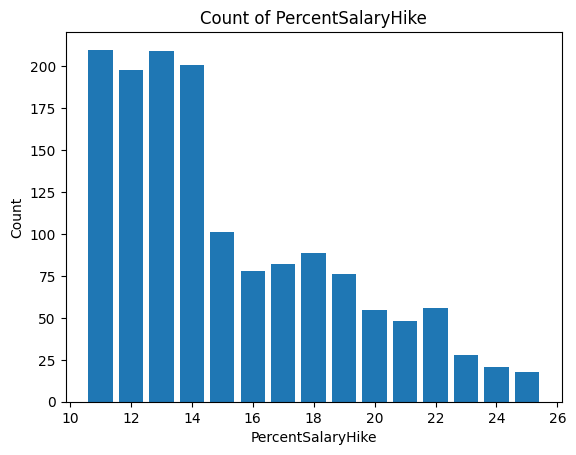

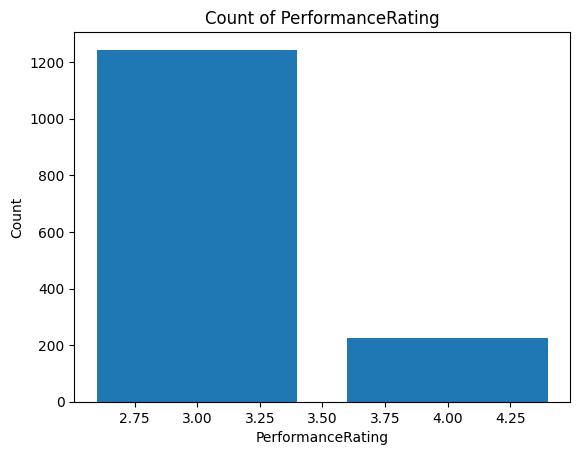

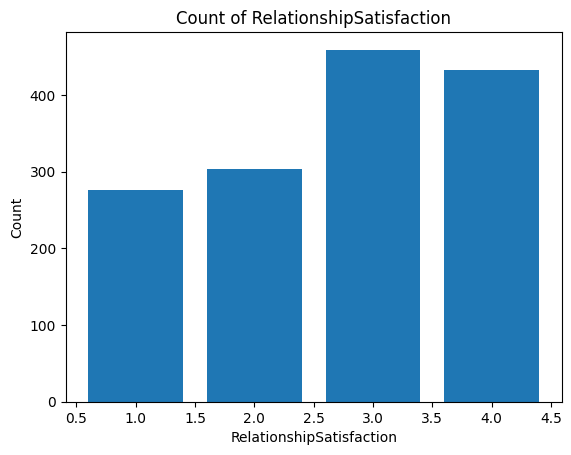

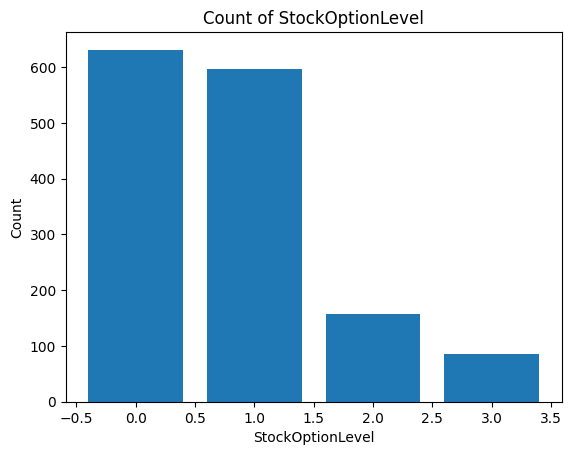

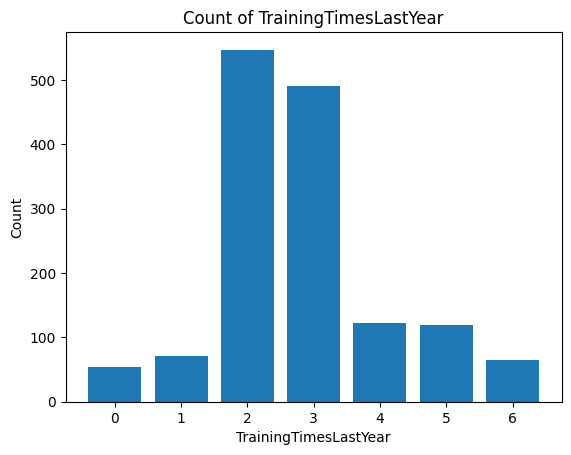

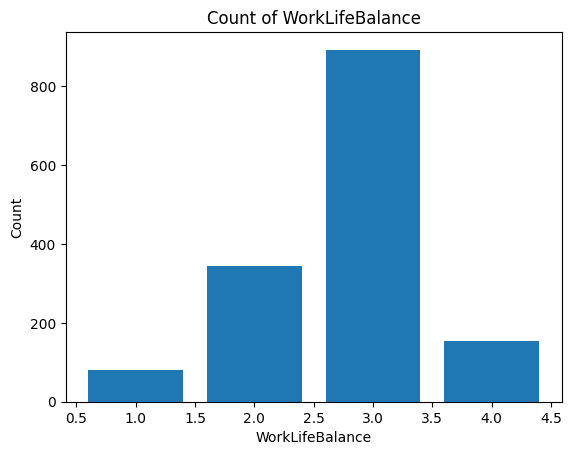

In [658]:

columns_to_plot = [
    'Education',
    'Attrition',
    'EnvironmentSatisfaction',
    'JobInvolvement',
    'JobLevel',
    'JobSatisfaction',
    'NumCompaniesWorked',
    'PercentSalaryHike',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'StockOptionLevel',
    'TrainingTimesLastYear',
    'WorkLifeBalance'
]


for col in columns_to_plot:
    plt.figure()
    value_counts = emp_details[col].value_counts().sort_index()
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()



###  Performance Rating (Target)
**Class Distribution (Imbalance Observed):**
- Rating 3 (High) → Majority  
- Rating 2 (Medium) → Moderate  
- Rating 1 (Low) → Very few  
**Insight:**  
The dataset is imbalanced. Since Rating 1 has significantly fewer samples, applying **SMOTE on training data** is recommended to prevent model bias toward the majority class.


###  Job Level
- Most employees are in **Level 1–2**
- Very few employees are in **Level 5**
**Insight:**  
The organization follows a **pyramid structure**, with more employees at entry and mid-level positions and fewer at senior levels.


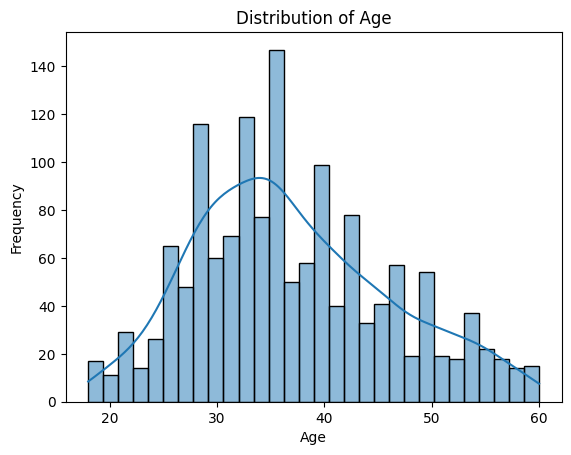

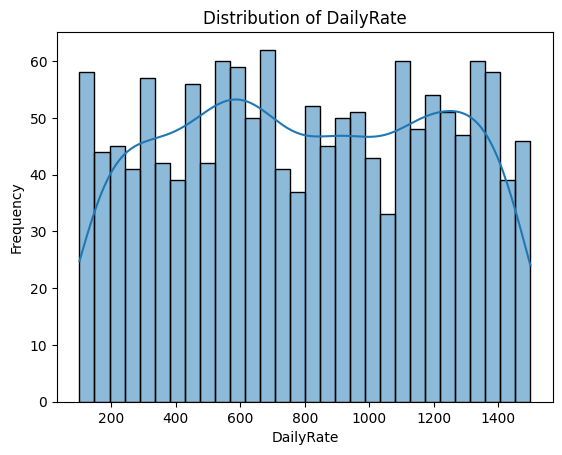

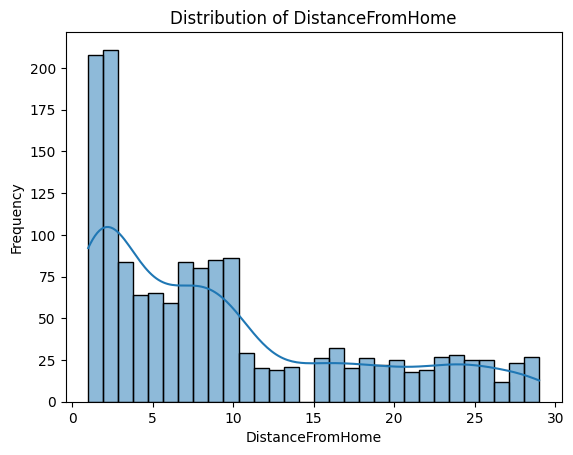

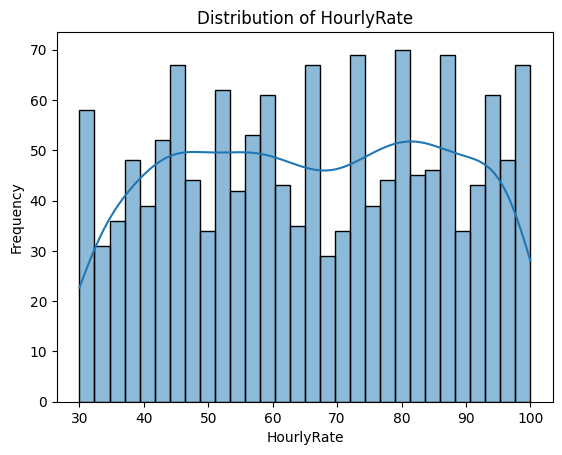

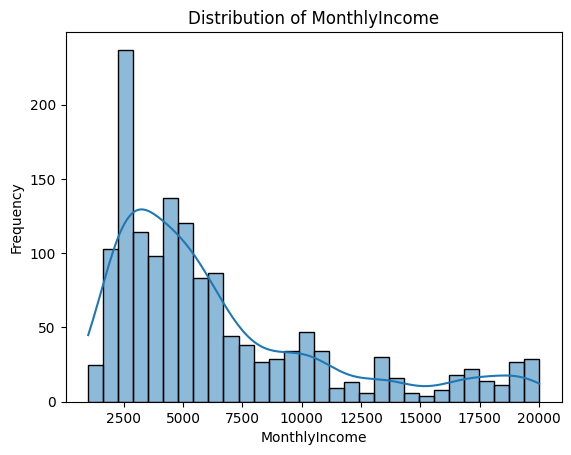

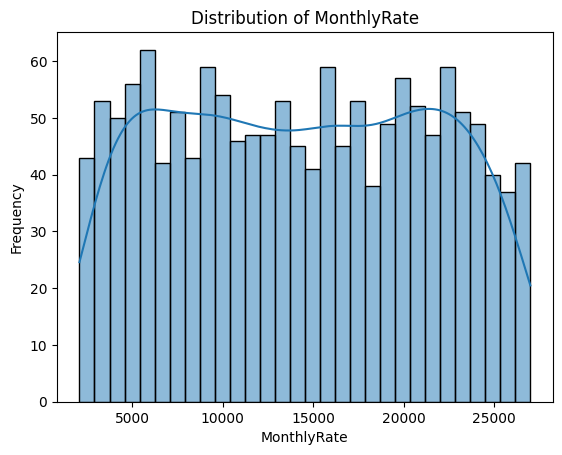

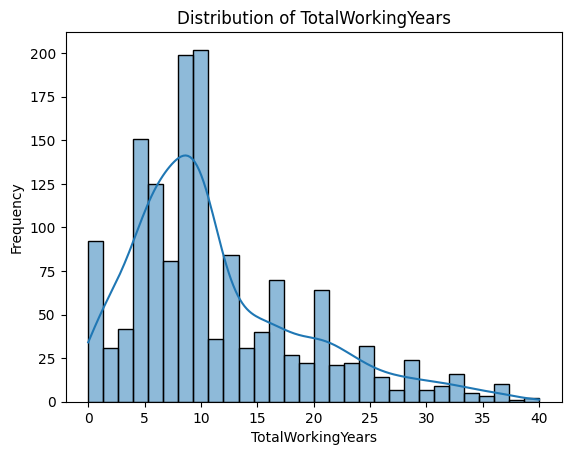

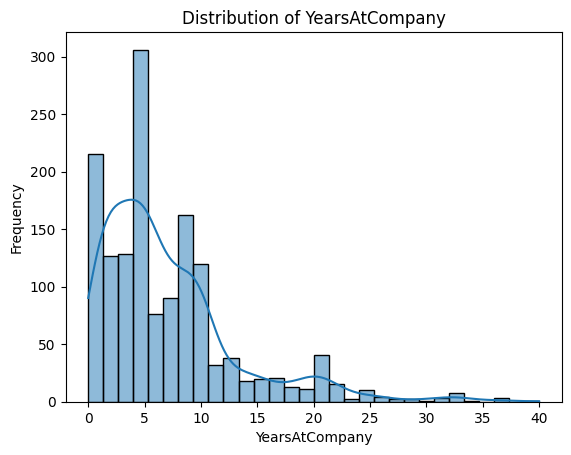

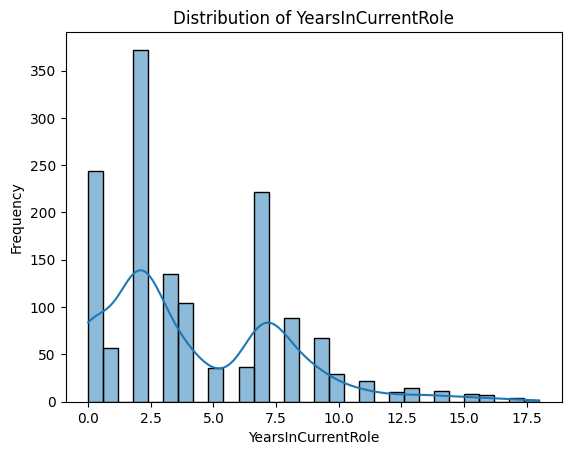

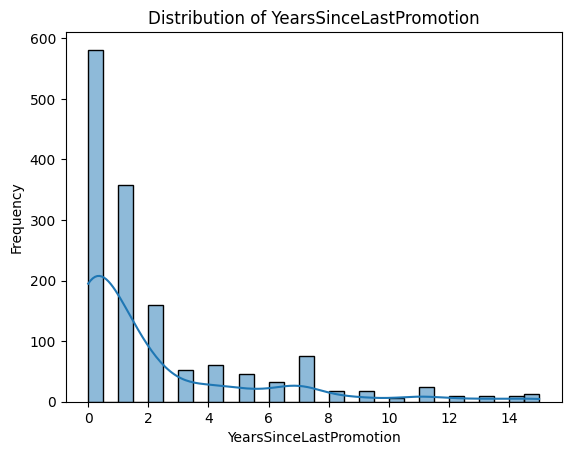

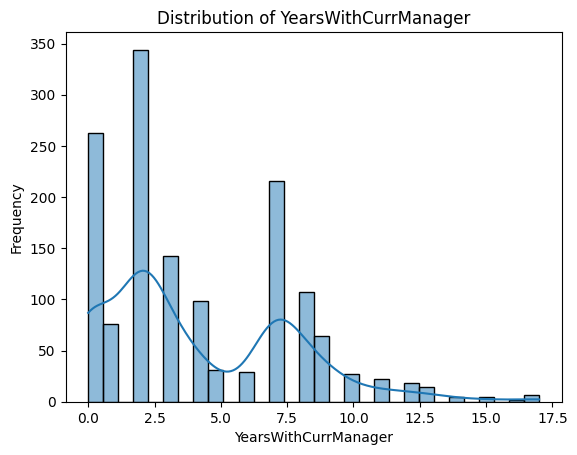

In [659]:

continuous_columns = [
    'Age',
    'DailyRate',
    'DistanceFromHome',
    'HourlyRate',
    'MonthlyIncome',
    'MonthlyRate',
    'TotalWorkingYears',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

import matplotlib.pyplot as plt

for col in continuous_columns:
    plt.figure()
    sns.histplot(emp_details[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



##  Age
- Most employees fall between **30–40 years**
- Very few employees are above **55 years**
- Distribution is **slightly right-skewed**
**Insight:**  
The workforce is predominantly **mid-career professionals**, indicating a stable and experienced employee base.

##  Monthly Income
- Distribution is **highly right-skewed**
- Majority of employees earn within **lower salary bands**
- Few extreme high earners are present (**outliers detected**)
**Insight:**  
Income distribution is uneven, suggesting that salary may strongly influence **job level and performance rating**.

##  Years at Company
- Many employees have **less than 5 years of experience**
- Noticeable drop-off after **10+ years**
**Insight:**  
This pattern may indicate **higher turnover rates** or a structured career growth cycle within the organization.


BIVARIATE ANALYSIS

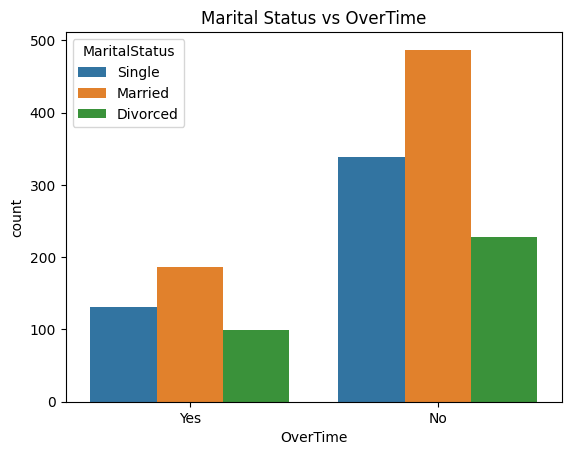

In [660]:
sns.countplot(x='OverTime', hue='MaritalStatus', data=emp_details)
plt.title("Marital Status vs OverTime")
plt.show()


## Insights:
- It is found that Maried employee Works Overtime
- It is found that Divorsed Employee Works less Overtime when compared to married Employee

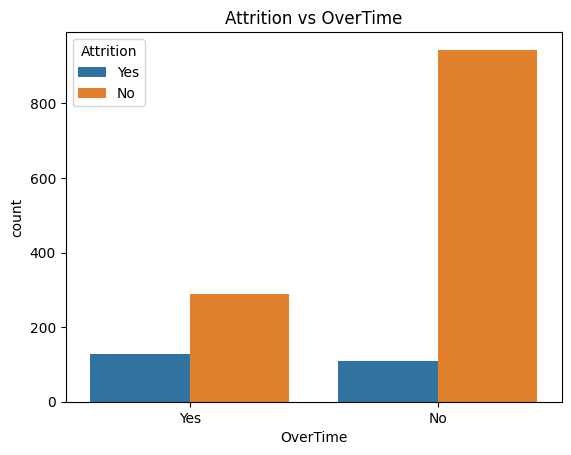

In [661]:
sns.countplot(x='OverTime', hue='Attrition', data=emp_details)
plt.title("Attrition vs OverTime")
plt.show()


### Insights:
- Attrition is High among people who is working Overtime

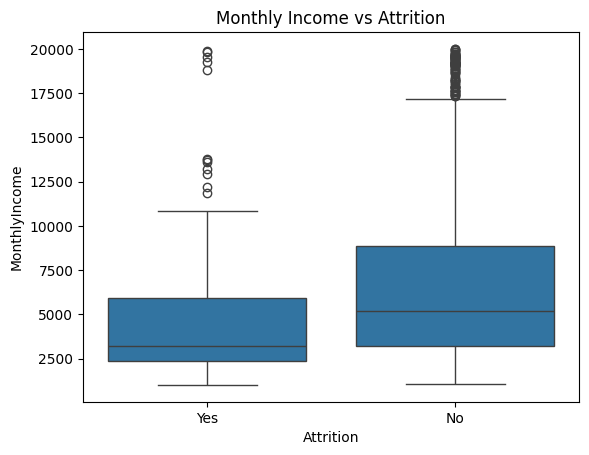

In [662]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=emp_details)
plt.title("Monthly Income vs Attrition")
plt.show()


### Insights
- Attrition is high Among People whose Monthly Inome is Less than 6000

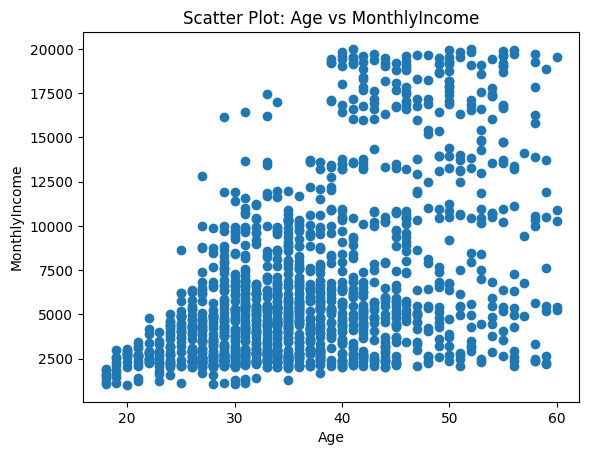

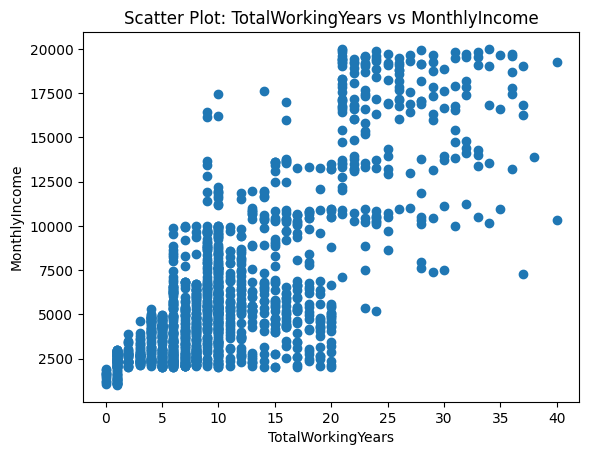

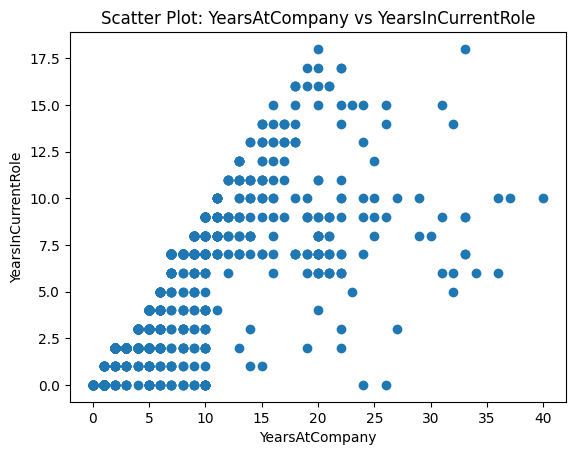

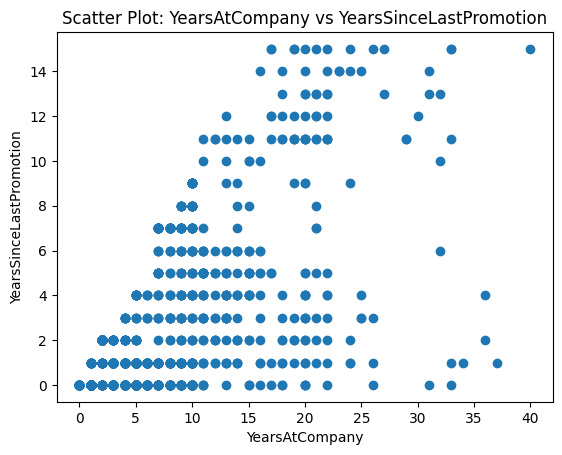

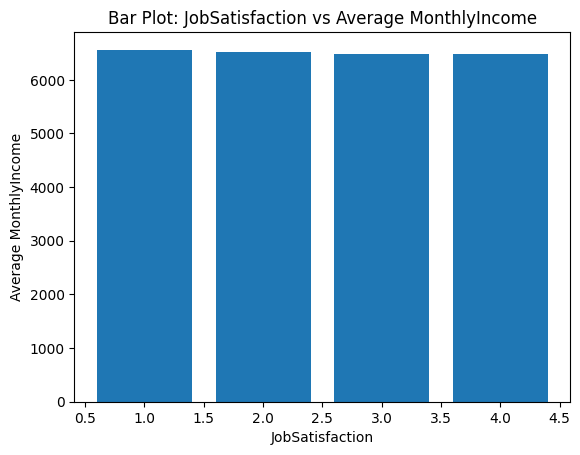

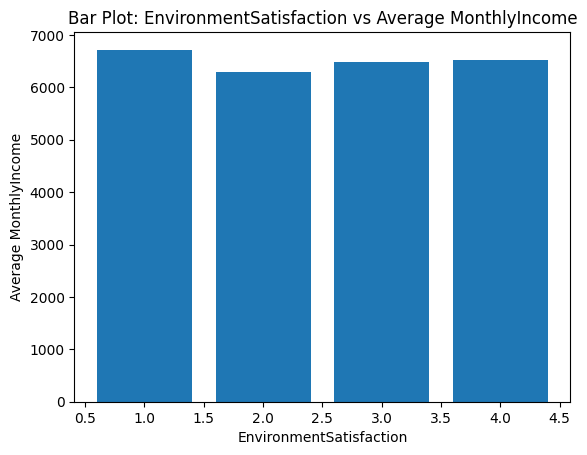

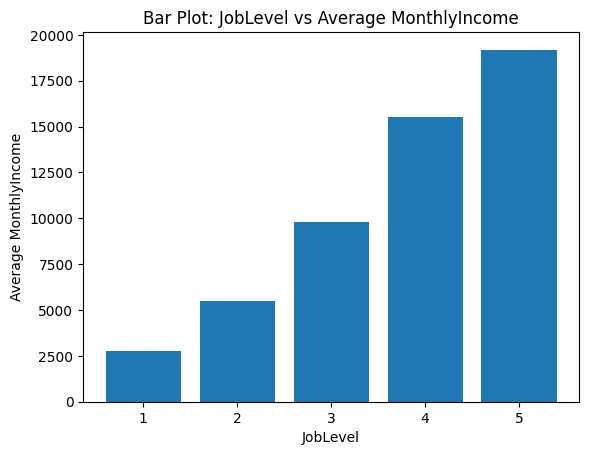

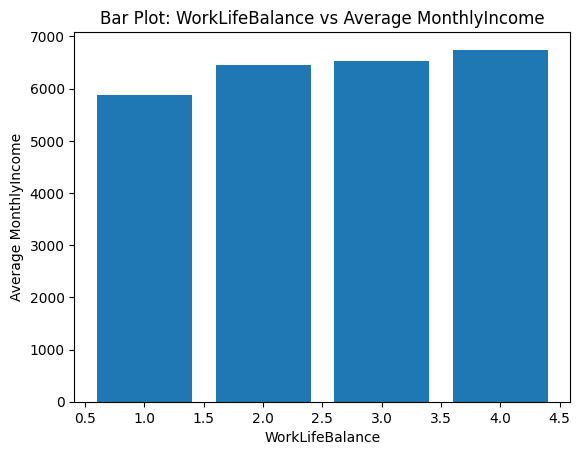

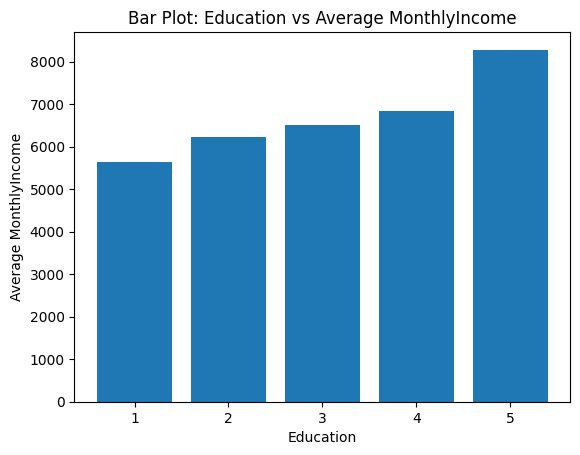

In [663]:
continuous_pairs = [
    ('Age', 'MonthlyIncome'),
    ('TotalWorkingYears', 'MonthlyIncome'),
    ('YearsAtCompany', 'YearsInCurrentRole'),
    ('YearsAtCompany', 'YearsSinceLastPromotion')
]

for x_col, y_col in continuous_pairs:
    plt.figure()
    plt.scatter(emp_details[x_col], emp_details[y_col])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Scatter Plot: {x_col} vs {y_col}')
    plt.show()



discrete_columns = [
    'JobSatisfaction',
    'EnvironmentSatisfaction',
    'JobLevel',
    'WorkLifeBalance',
    'Education'
]

continuous_target = 'MonthlyIncome'

for col in discrete_columns:
    plt.figure()
    mean_values = emp_details.groupby(col)[continuous_target].mean()
    plt.bar(mean_values.index, mean_values.values)
    plt.xlabel(col)
    plt.ylabel(f'Average {continuous_target}')
    plt.title(f'Bar Plot: {col} vs Average {continuous_target}')
    plt.show()

# INSIGHTS

##  A. Numerical Features vs Target
###  Monthly Income vs Performance Rating
- Higher performance rating → Higher average monthly income  
- Clear positive relationship observed  
**Conclusion:**  
Monthly income is strongly associated with performance rating.

###  Years in Current Role vs Performance Rating
- Employees with **2–6 years** in the same role often show higher ratings  
- Very short or very long tenure shows relatively lower ratings  
**Conclusion:**  
Role stability improves performance up to a certain threshold, after which growth may plateau.

###  Job Involvement vs Performance Rating
- High job involvement → High performance rating  
- Low job involvement → Lower performance rating  
**Conclusion:**  
Job involvement is a strong predictor of employee performance.


##  B. Categorical Features vs Target
###  Job Level vs Performance Rating
- Higher job level → More likely to receive Rating 3  
- Lower job levels → Mostly Rating 2 or 1  
**Conclusion:**  
Job level is a highly influential factor in determining performance rating.


###  Environment Satisfaction vs Performance Rating
- High satisfaction → Mostly Rating 3  
- Low satisfaction → More Rating 1  

**Conclusion:**  
Psychological and workplace satisfaction factors significantly impact employee performance.

---

MULTIVARIATE ANALSIS

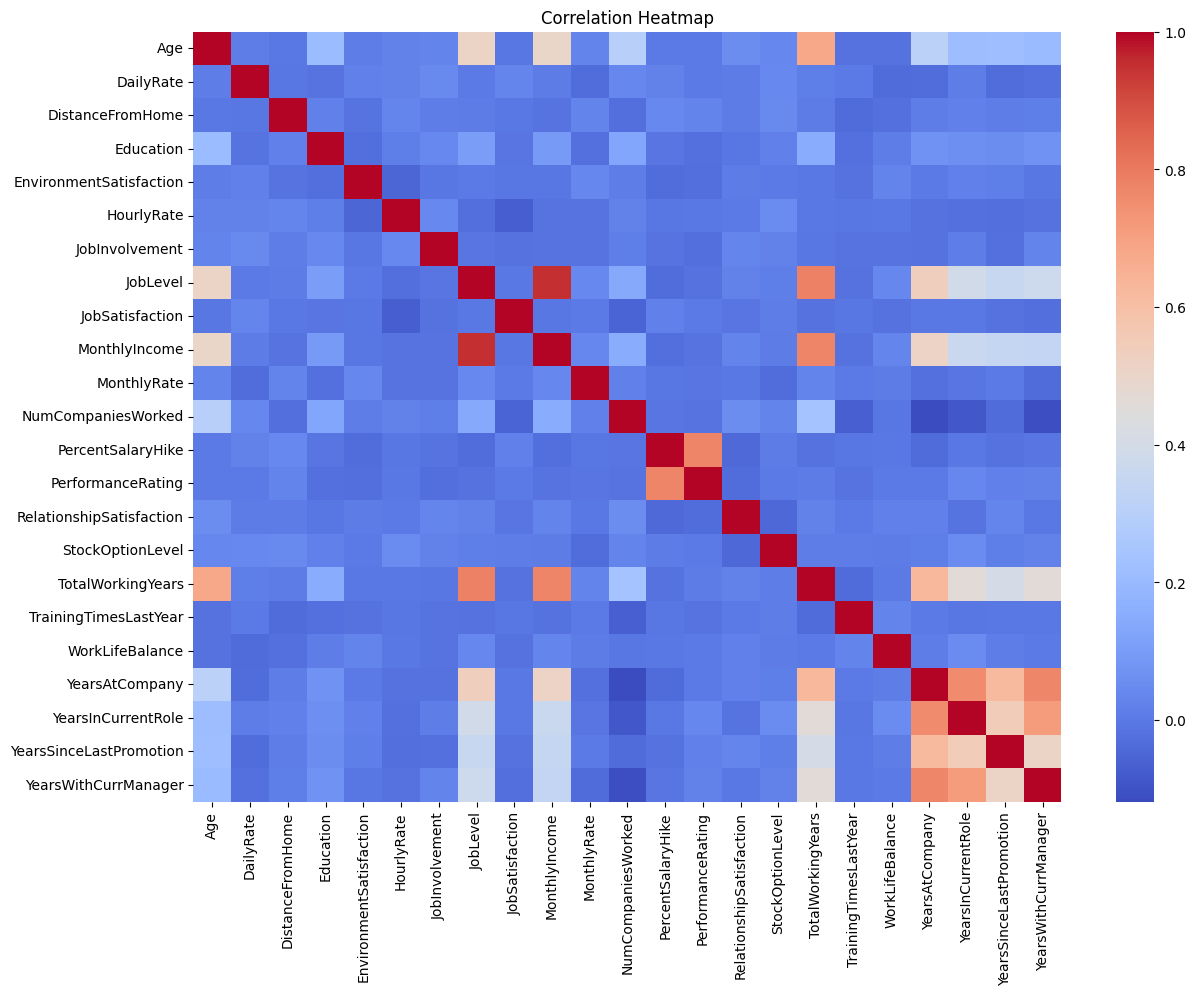

In [664]:
plt.figure(figsize=(14,10))
sns.heatmap(emp_details.select_dtypes(include='number').corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

## ✅ Correlation Matrix Insights

### 🔹 Strong Positive Correlations

- **Job Level ↔ Monthly Income**  
  Higher job levels are strongly associated with higher monthly income.

- **Years at Company ↔ Years in Current Role**  
  Employees who have been longer in the company tend to stay longer in their current roles.

- **Job Involvement ↔ Performance Rating**  
  Increased job involvement is positively correlated with higher performance ratings.


### 🔹 Weak Correlations

- **Distance from Home ↔ Performance Rating**  
  Distance from home shows little to no significant relationship with employee performance.


**Overall Insight:**  
Performance is more influenced by organizational and psychological factors (job level, income, involvement) than by external factors like commute distance.


STATISTICAL TEST

In [665]:


stayed = emp_details[emp_details['Attrition'] == 'No']['MonthlyIncome']
left = emp_details[emp_details['Attrition'] == 'Yes']['MonthlyIncome']

ttest_ind(stayed, left)

TtestResult(statistic=np.float64(6.203935765608938), pvalue=np.float64(7.147363985353823e-10), df=np.float64(1468.0))

In [666]:


stayed = emp_details[emp_details['Attrition'] == 'No']['TotalWorkingYears']
left = emp_details[emp_details['Attrition'] == 'Yes']['TotalWorkingYears']

ttest_ind(stayed, left)

TtestResult(statistic=np.float64(6.6522546135024445), pvalue=np.float64(4.061878111266855e-11), df=np.float64(1468.0))

In [667]:


stayed = emp_details[emp_details['Attrition'] == 'No']['YearsAtCompany']
left = emp_details[emp_details['Attrition'] == 'Yes']['YearsAtCompany']

ttest_ind(stayed, left)

TtestResult(statistic=np.float64(5.1963086670254235), pvalue=np.float64(2.3188716103862972e-07), df=np.float64(1468.0))

In [668]:


stayed = emp_details[emp_details['Attrition'] == 'No']['DistanceFromHome']
left = emp_details[emp_details['Attrition'] == 'Yes']['DistanceFromHome']

ttest_ind(stayed, left)

TtestResult(statistic=np.float64(-2.994708098265125), pvalue=np.float64(0.0027930600802134322), df=np.float64(1468.0))

In [669]:


contingency = pd.crosstab(emp_details['OverTime'], emp_details['Attrition'])
chi2_contingency(contingency)

Chi2ContingencyResult(statistic=np.float64(87.56429365828768), pvalue=np.float64(8.158423721538322e-21), dof=1, expected_freq=array([[884.06938776, 169.93061224],
       [348.93061224,  67.06938776]]))

In [670]:


contingency = pd.crosstab(emp_details['Department'], emp_details['Attrition'])
chi2_contingency(contingency)

Chi2ContingencyResult(statistic=np.float64(10.79600732241067), pvalue=np.float64(0.004525606574479634), dof=2, expected_freq=array([[ 52.84285714,  10.15714286],
       [806.06326531, 154.93673469],
       [374.09387755,  71.90612245]]))

In [671]:

contingency = pd.crosstab(emp_details['JobRole'], emp_details['Attrition'])
chi2_contingency(contingency)

Chi2ContingencyResult(statistic=np.float64(86.19025367670434), pvalue=np.float64(2.7524816380506567e-15), dof=8, expected_freq=array([[109.87959184,  21.12040816],
       [ 43.61632653,   8.38367347],
       [217.24285714,  41.75714286],
       [ 85.55510204,  16.44489796],
       [121.62244898,  23.37755102],
       [ 67.10204082,  12.89795918],
       [244.92244898,  47.07755102],
       [273.44081633,  52.55918367],
       [ 69.61836735,  13.38163265]]))

In [672]:


contingency = pd.crosstab(emp_details['MaritalStatus'], emp_details['Attrition'])
chi2_contingency(contingency)

Chi2ContingencyResult(statistic=np.float64(46.163676540848705), pvalue=np.float64(9.455511060340833e-11), dof=2, expected_freq=array([[274.27959184,  52.72040816],
       [564.49591837, 108.50408163],
       [394.2244898 ,  75.7755102 ]]))

In [673]:


contingency = pd.crosstab(emp_details['JobSatisfaction'], emp_details['Attrition'])
chi2_contingency(contingency)

Chi2ContingencyResult(statistic=np.float64(17.505077010348), pvalue=np.float64(0.0005563004510387556), dof=3, expected_freq=array([[242.40612245,  46.59387755],
       [234.85714286,  45.14285714],
       [370.73877551,  71.26122449],
       [384.99795918,  74.00204082]]))

In [674]:
num_cols = emp_details.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [675]:
cat_cols = emp_details.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [676]:
X = final_df.drop('Attrition', axis=1)
y = final_df['Attrition']

In [677]:
le = LabelEncoder()
binary_cols = ['Attrition', 'OverTime', 'Gender']

for col in binary_cols:
    emp_details[col] = le.fit_transform(emp_details[col])


In [678]:
emp_details = pd.get_dummies(emp_details, drop_first=True)

In [679]:

scaler = StandardScaler()
X = emp_details.drop('Attrition', axis=1)
y = emp_details['Attrition']

X_scaled = scaler.fit_transform(X)

In [680]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [681]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1972, 44)
X_test shape: (494, 44)
y_train shape: (1972,)
y_test shape: (494,)


In [682]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [683]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

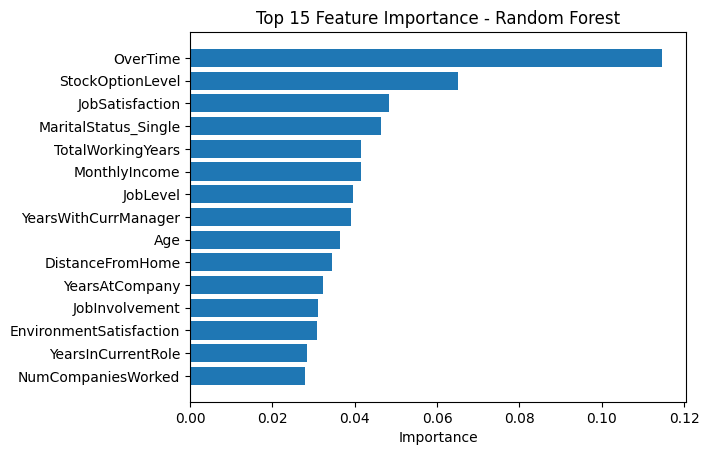

In [684]:
# Get feature importance
importances = rf.feature_importances_
features = X.columns

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Top 15 Important Features
top_n = 15
top_features = importance_df.head(top_n)

plt.figure()
plt.barh(top_features['Feature'], top_features['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top 15 Feature Importance - Random Forest")
plt.show()

In [685]:

y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7874493927125507
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       250
           1       0.77      0.81      0.79       244

    accuracy                           0.79       494
   macro avg       0.79      0.79      0.79       494
weighted avg       0.79      0.79      0.79       494

AUC: 0.8743770491803278
[[192  58]
 [ 47 197]]


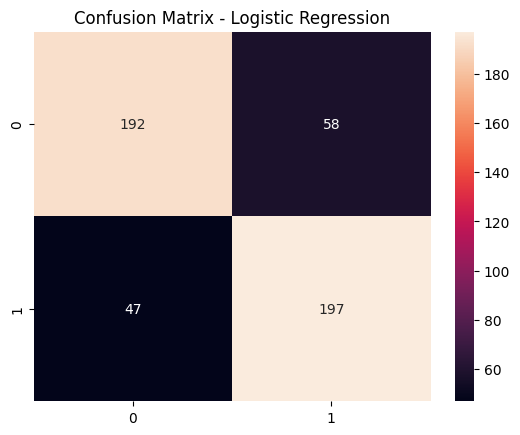

In [686]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [687]:


y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9412955465587044
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       250
           1       0.97      0.91      0.94       244

    accuracy                           0.94       494
   macro avg       0.94      0.94      0.94       494
weighted avg       0.94      0.94      0.94       494

AUC: 0.9809672131147542
[[242   8]
 [ 21 223]]


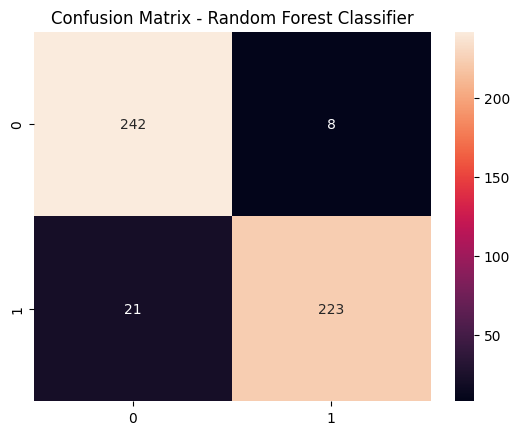

In [688]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

In [689]:
log_probs = lr.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]

In [690]:


fpr_log, tpr_log, thresholds_log = roc_curve(y_test, log_probs)
auc_log = roc_auc_score(y_test, log_probs)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_probs)
auc_rf = roc_auc_score(y_test, rf_probs)

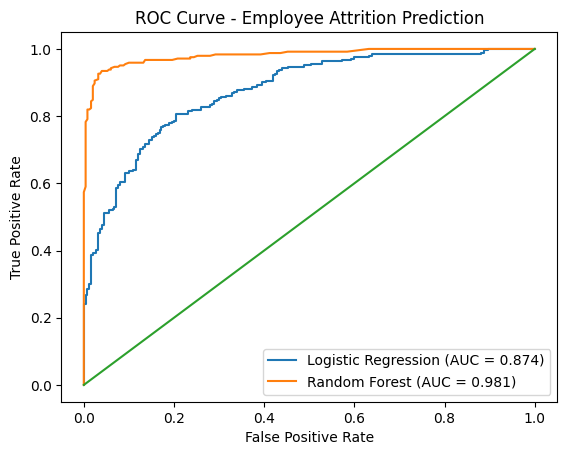

In [691]:
plt.figure()
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')
plt.plot([0, 1], [0, 1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Employee Attrition Prediction")
plt.legend()
plt.show() 

In [692]:


# Logistic Regression CV
log_cv_auc = cross_val_score(
    lr,
    X,
    y,
    cv=5,
    scoring='roc_auc'
)

# Random Forest CV
rf_cv_auc = cross_val_score(
    rf,
    X,
    y,
    cv=5,
    scoring='roc_auc'
)

print("Logistic Regression CV AUC:", log_cv_auc)
print("Logistic Regression Mean AUC:", log_cv_auc.mean())

print("\nRandom Forest CV AUC:", rf_cv_auc)
print("Random Forest Mean AUC:", rf_cv_auc.mean())

e:\GUVI PROJECTS\Attrition\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
e:\GUVI PROJECTS\Attrition\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.htm

Logistic Regression CV AUC: [0.72611789 0.73314702 0.68524421 0.69377207 0.74993539]
Logistic Regression Mean AUC: 0.7176433161146581

Random Forest CV AUC: [0.8222815  0.7554624  0.83805668 0.76406237 0.84236368]
Random Forest Mean AUC: 0.8044453262712489


In [693]:

lr = LogisticRegression(max_iter=1000)

param_grid_log = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],          # 'l1' needs saga/saga solver; keep it simple here
    'solver': ['lbfgs', 'liblinear']
}

grid_log = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_log,
    cv=5,
    scoring='f1',      # or 'accuracy', 'roc_auc'
    n_jobs=-1
)

grid_log.fit(X_train, y_train)

print("Best params (LogReg):", grid_log.best_params_)
print("Best CV score (LogReg):", grid_log.best_score_)

best_log_reg = grid_log.best_estimator_

Best params (LogReg): {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV score (LogReg): 0.8077091866124189


e:\GUVI PROJECTS\Attrition\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


In [694]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# GridSearch
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best AUC Score: 0.8150573021095445


In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)   

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [699]:
rf.predict(X_train[:10])

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [700]:


# Save model
with open("model/rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)

# Save scaler
with open("model/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)